## This code implements a linear model, included both analytical and numerical methods

In [1]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [2]:
# Generate data
N = 10**6 # number of samples
x = np.random.rand(N,1)
# Add random noise
y =  4.54 + 3.15*x + np.random.randn(N,1)

In [3]:
# Add column ones 
ones = np.ones((x.shape[0],1))
Xhat = np.concatenate((ones, x), axis = 1)

In [4]:
# Creat decorator to measure runtime
def time_measure(fn):
    def get_time(*args, **kwargs):
        start = time.time()
        output = fn(*args, **kwargs)
        print(f"Runtime in function {fn.__name__} is {time.time() - start} ")
        return output # make sure that the decorator returns the output of fn
    return get_time

## Method 1. Analytical Method

In [5]:
# Calculate by using closed-form
@time_measure
def closed_form(X, y):
    A = np.dot(X.T, X)
    b = np.dot(X.T, y)
    w = np.dot(np.linalg.pinv(A), b)
    return w

In [6]:
w = closed_form(Xhat,y)
# Calculate MSE
def mse_lr(w):
    err = np.dot(Xhat, w) - y
    return (1/N)*np.linalg.norm(err)**2

err1 = mse_lr(w)
print (f"MSE error of closed-form method is {err1}")
w

Runtime in function closed_form is 0.007978677749633789 
MSE error of closed-form method is 0.9998203201973658


array([[4.53943423],
       [3.14927225]])

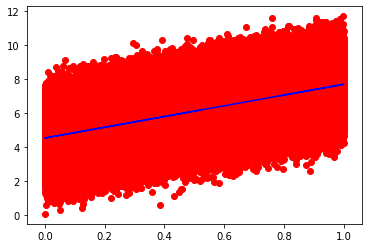

In [7]:
# Plot
plt.scatter(x, y, color = 'red')
plt.plot(x, np.dot(Xhat, w), color = 'blue')

## Method 2. Numerical Method

In [8]:
# Calculate by applying Gradient Decent 
def grad_mse(w):
    err = np.dot(Xhat, w) - y
    return (2/N)*np.dot(Xhat.T, err)


def mse_lr(w):
    err = np.dot(Xhat, w) - y
    return (1/N)*np.linalg.norm(err)**2

@time_measure
def GD(w, alpha, eta):
    """
    alpha: step size
    eta: stop condition
    """
    for i in range(10000):
        w_new = w - alpha*grad_mse(w)
        if np.linalg.norm(grad_mse(w)) < eta:
            break
        w = w_new
    print (f"MSE error of {GD.__name__} method is {mse_lr(w_new)} after {i} iterations")
    return w_new

In [9]:
w2 = np.array([[25083], [9687]]) # Initial guess
alpha = 0.1
eta = 1e-3
w_new = GD(w2, alpha, eta)
w_new

MSE error of get_time method is 0.9998239441606372 after 982 iterations
Runtime in function GD is 18.653109550476074 


array([[4.54293945],
       [3.14272519]])

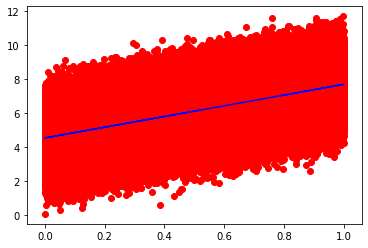

In [10]:
# Plot
plt.scatter(x, y, color = 'red')
plt.plot(x, np.dot(Xhat, w_new), color = 'blue')